In [46]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images
# Keras Libraries <- CNN
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
#from sklearn.metrics import classification_report, confusion_matrix # <- define evaluation metrics

In [47]:
mainDIR = os.listdir('./chest_xray')
print(mainDIR)

train_folder= './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'

# train
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

#Normal pic
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

['test', 'train', '__MACOSX', 'val', 'chest_xray']
1341
normal picture title:  IM-0569-0001.jpeg
pneumonia picture title: person1143_virus_1896.jpeg


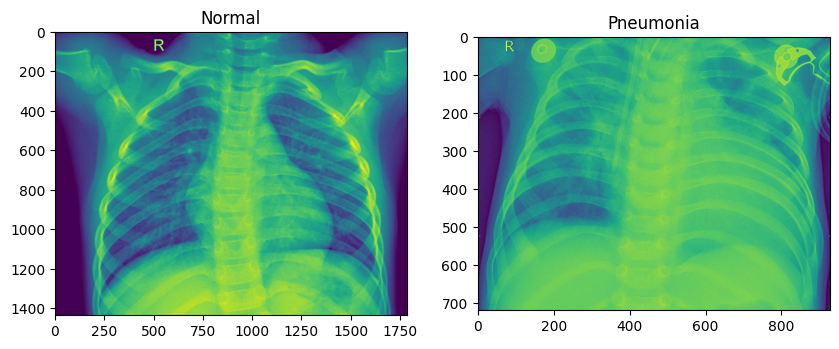

In [48]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)
#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()
# let's build the CNN model

In [49]:
num_of_test_samples = 600
batch_size = 32
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image
train_datagen = ImageDataGenerator(rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #Image normalization.
training_set = train_datagen.flow_from_directory('./chest_xray/train',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory('./chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')
test_set = test_datagen.flow_from_directory('./chest_xray/test',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [50]:
from tensorflow import keras

# 모델 아키텍처 정의
model=keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), ))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))

model.add(keras.layers.Dense(1, activation='sigmoid'))


/home/ubuntu/workdir/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
# 훈련 데이터를 이용해 모델 학습
cnn_model = model.fit(training_set, epochs=5)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - accuracy: 0.8058 - loss: 0.4605
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 140ms/step - accuracy: 0.8982 - loss: 0.2522
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 134ms/step - accuracy: 0.9137 - loss: 0.2134
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.9287 - loss: 0.1816
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 135ms/step - accuracy: 0.9294 - loss: 0.1727


dict_keys(['accuracy', 'loss'])


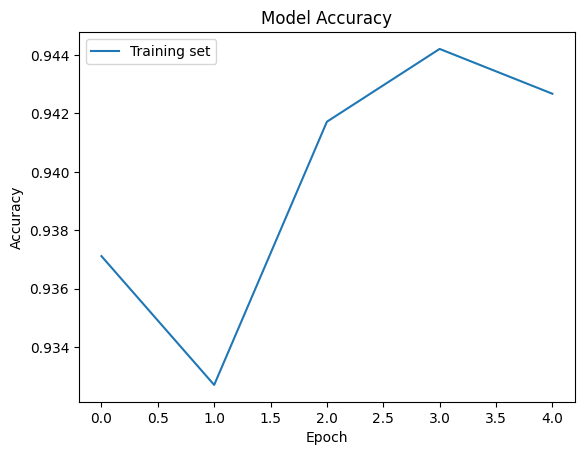

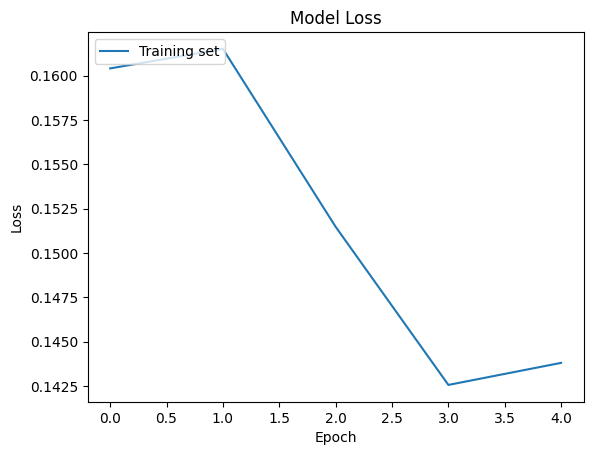

<Figure size 640x480 with 0 Axes>

In [44]:
# Check available keys in the history object
print(cnn_model.history.keys())

# Accuracy
plt.plot(cnn_model.history['accuracy'])
if 'val_accuracy' in cnn_model.history:
    plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.savefig('train_accuracy.png')
plt.show(block=False)
plt.clf()

# Loss
plt.plot(cnn_model.history['loss'])
if 'val_loss' in cnn_model.history:
    plt.plot(cnn_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'],
loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()

In [28]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('테스트 loss:', test_loss, '테스트 정확도:', test_acc)

20/20 - 2s - 102ms/step - accuracy: 0.9087 - loss: 0.2475
테스트 loss: 0.24752265214920044 테스트 정확도: 0.9086538553237915


In [43]:
model.save('medical_ann.h5')